In [0]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

In [11]:
cd "/content/drive/My Drive/Colab Notebooks/dw_matrix/"

/content/drive/My Drive/Colab Notebooks/dw_matrix


In [12]:
ls data

men_shoes.csv


In [16]:
df=pd.read_csv('data/men_shoes.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [18]:
df.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'count', 'dateadded',
       'dateupdated', 'descriptions', 'dimension', 'ean', 'features',
       'flavors', 'imageurls', 'isbn', 'keys', 'manufacturer',
       'manufacturernumber', 'merchants', 'name', 'prices_amountmin',
       'prices_amountmax', 'prices_availability', 'prices_color',
       'prices_condition', 'prices_count', 'prices_currency',
       'prices_dateadded', 'prices_dateseen', 'prices_flavor', 'prices_issale',
       'prices_merchant', 'prices_offer', 'prices_returnpolicy',
       'prices_shipping', 'prices_size', 'prices_source', 'prices_sourceurls',
       'prices_warranty', 'quantities', 'reviews', 'sizes', 'skus',
       'sourceurls', 'upc', 'vin', 'websiteids', 'weight'],
      dtype='object')

In [21]:
mean_price=np.mean(df['prices_amountmin'])
mean_price

93.53952188183217

In [0]:
y_true=df['prices_amountmin']
y_pred=[mean_price]*y_true.shape[0]

In [32]:
mean_absolute_error(y_true, y_pred)

63.968341227870624

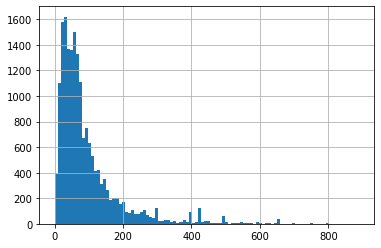

In [24]:
df['prices_amountmin'].hist(bins=100)

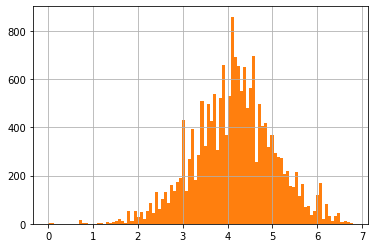

In [28]:
np.log(df['prices_amountmin']+1).hist(bins=100)
np.log1p(df['prices_amountmin']).hist(bins=100)

In [38]:
y_true=df['prices_amountmin']
y_pred=[np.median(y_true)]*y_true.shape[0]
mean_absolute_error(y_true, y_pred)

58.01120240700219

In [42]:
y_true=df['prices_amountmin']
price_log_mean=np.expm1(np.mean(np.log1p(y_true)))
y_pred=[price_log_mean]*y_true.shape[0]
mean_absolute_error(y_true, y_pred)

58.03539547661041

In [41]:
price_log_mean=np.expm1(np.mean(np.log1p(y_true)))
price_log_mean

62.92811169273113

In [44]:
df.brand.value_counts()

Nike             1709
PUMA              574
Ralph Lauren      524
New Balance       361
VANS              356
                 ... 
Cudas               1
AB Earth            1
Montrail            1
Timeless Toys       1
AIR BALANCE         1
Name: brand, Length: 1856, dtype: int64

In [48]:
df['brand'].factorize()[0]

array([  0,   0,   1, ..., 411, 411, 411])

In [0]:
df['brand_cat']=df['brand'].factorize()[0]


In [54]:
feats=['brand_cat']
X=df[feats].values
y=df['prices_amountmin'].values

model=DecisionTreeRegressor(max_depth=5)
scores=cross_val_score(model,X,y,scoring='neg_mean_absolute_error')
np.mean(scores), np.std(scores)

(-58.38655694633361, 4.223555478221712)

In [0]:
def run_model(feats):
  X=df[feats].values
  y=df['prices_amountmin'].values

  model=DecisionTreeRegressor(max_depth=5)
  scores=cross_val_score(model,X,y,scoring='neg_mean_absolute_error')
  return np.mean(scores), np.std(scores)

In [56]:
run_model(['brand_cat'])

(-58.38655694633361, 4.223555478221712)

In [57]:
df['manu_cat']=df['manufacturer'].factorize()[0]
run_model(['manu_cat'])

(-63.133649278023746, 3.394307434888982)

In [58]:
run_model(['brand_cat','manu_cat'])

(-58.539304199085976, 4.311223231615451)